# Loading data

In [1]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

##Importing libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (16, 5)

#Importing libraries for stop future warnings
import warnings
warnings.filterwarnings('ignore')

#Importing libraries for times series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller

# Loading data

In [2]:
#Loading data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/RestaurantVisitors.csv',
                  index_col='date',
                  parse_dates=True)

In [3]:
#Changing the frequency
data.index.freq = 'D'

In [4]:
#Checking data
data

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


Observation:
- The data consist of 17 months data on daily basis frequency
- 517 days of 1 year and 7 months

# Removing NA

In [5]:
#Removing missing data
data1 = data.dropna()

In [6]:
#Checking data
data1

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0


# Changing data type

In [7]:
#Checking data type
data1.dtypes

weekday          object
holiday           int64
holiday_name     object
rest1           float64
rest2           float64
rest3           float64
rest4           float64
total           float64
dtype: object

In [8]:
#Extracting variable names
data1.keys()

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [9]:
#Changing data type into integer
col = ['rest1', 'rest2', 'rest3','rest4']
for i in col:
    data1[i] = data1[i].astype(int)

In [10]:
#Checking data
data1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296.0
2016-01-02,Saturday,0,na,24,39,43,85,191.0
2016-01-03,Sunday,0,na,24,31,66,81,202.0
2016-01-04,Monday,0,na,23,18,32,32,105.0
2016-01-05,Tuesday,0,na,2,15,38,43,98.0


# Visualizing the data

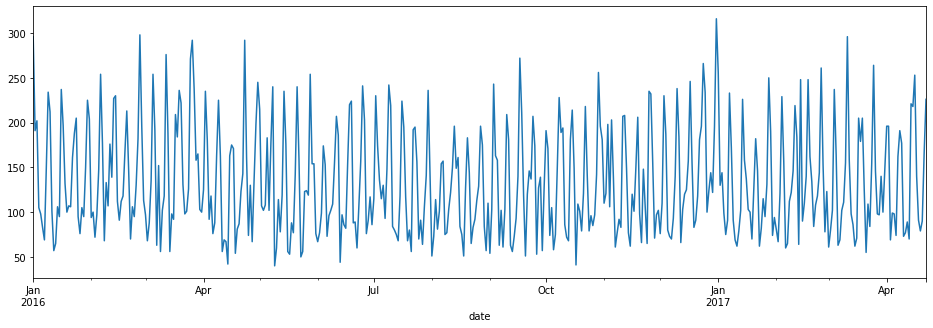

In [11]:
#Plotting the data
data1['total'].plot();

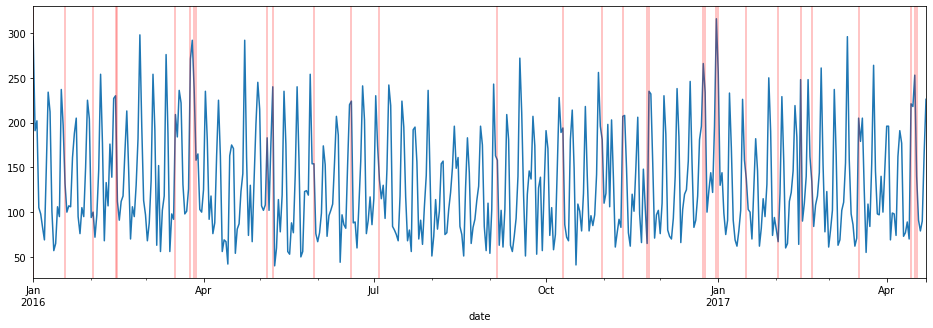

In [12]:
#Ploting data including showing holidays
ax = data1['total'].plot();
for i in data1[data1['holiday']==1].index:
    ax.axvline(x=i, color = 'r', alpha = 0.3);

# Checking stationarity

In [13]:
#Checking stationarity
def DICKY_FULLER_TEST(data):
    result = adfuller(data)
    critical_value = result[0]
    p_value = result[1]
    lags = result[2]
    observation = result[3]
    cv = []
    print('Dicky Fuller Test Summary:')
    print('1. ADFT Statistics:',critical_value)
    print('2. P-value        :',p_value)
    print('3. Lags           :',lags)
    print('4. Observations   :',observation)
    print('5. Critical Values:')
    for i,j in result[4].items():
        cv.append(j)
        print('                  ',i,'=>',j)
    print('6.Test conclusion from p-value :')
    if p_value<=0.05:
        print('   - Strong evidence against the null hypothesis')
        print('   - Reject the null hypothesis')
        print('   - Data has no unit root and is stationary')
    else:
        print('   - Weak evidence against the null hypothesis')
        print('   - Fail to reject the null hypothesis')
        print('   - Data has a unit root and is non-stationary')
    print('7.Test conclusion from critical value :')
    if (critical_value<cv[0]) & (critical_value<cv[1]) & (critical_value<cv[2]):
        print('   - It is a stationary')
    else:
        print('   - It is not a stationary')
        
DICKY_FULLER_TEST(data1['total'])

Dicky Fuller Test Summary:
1. ADFT Statistics: -5.592496972543474
2. P-value        : 1.319377094694154e-06
3. Lags           : 18
4. Observations   : 459
5. Critical Values:
                   1% => -3.4446773373329576
                   5% => -2.8678574606780654
                   10% => -2.5701349669405404
6.Test conclusion from p-value :
   - Strong evidence against the null hypothesis
   - Reject the null hypothesis
   - Data has no unit root and is stationary
7.Test conclusion from critical value :
   - It is a stationary


# Decomposing the data

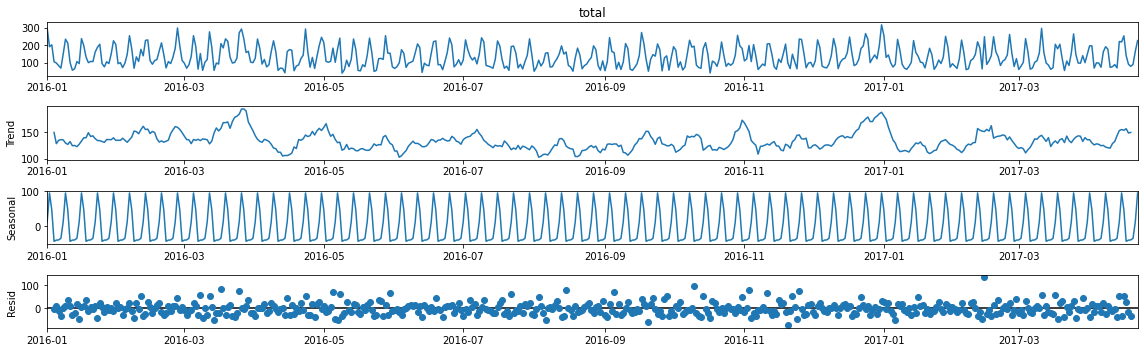

In [14]:
#Decomposing the data
decompose = seasonal_decompose(data1['total'])
decompose.plot();

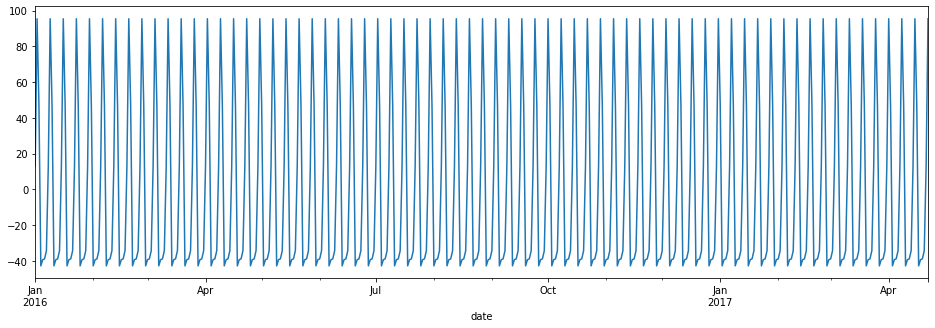

In [15]:
#Creating seasonal plot
decompose.seasonal.plot();

- It has weekly seasonality

# Splitting data into train and test

In [16]:
#Splitting data into train and test
train = data1[:436]
test = data1[436:]
train.shape, test.shape

((436, 8), (42, 8))

# Performing Auto ARIMA

In [17]:
#Performing auto ARIMA
auto_arima(data1['total'],
           seasonal=True,
           m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2383.546
Date:                   Tue, 30 Mar 2021   AIC                           4775.092
Time:                           13:06:46   BIC                           4791.771
Sample:                                0   HQIC                          4781.649
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.6671      1.625      2.872      0.004       1.482       7.852
ar.S.L7        0.9636      0.012     77.341      0.000       0.939       0.988
ma.S.L7       -0.7693      0.047    -16.250      0.000      -0.862      -0.676
sigma2      1193.3865     69.210     17.243      0.000    1057.737    1329.036
===================================================================================
Ljung-Box (L1) (Q):                  16.44   Jarque-Bera (JB):                66.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.76
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Observation:
- As per the auto ARIMA, We have got seasonal order (1,0,1,7)

# Creating SARIMA Model

c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


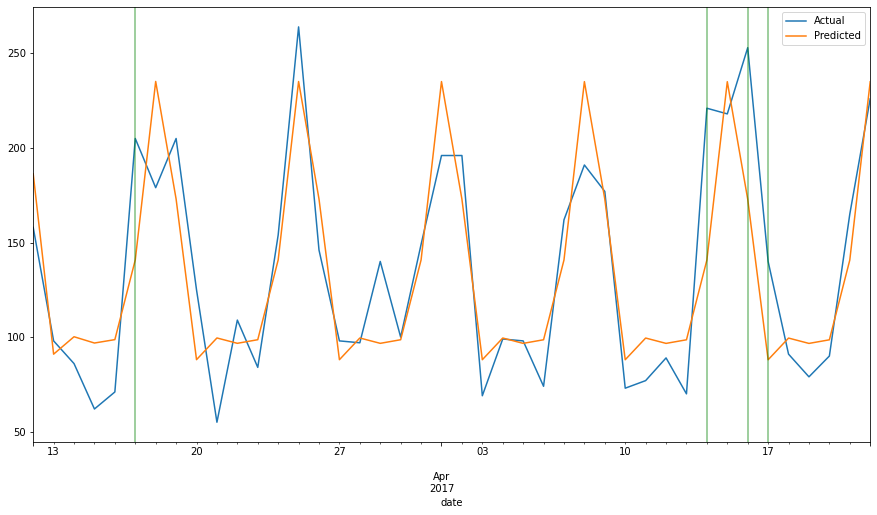

In [18]:
#Creating SARIMAX model
model = SARIMAX(train['total'],
                seasonal_order=(1,0,1,7), 
                enforce_invertibility=False)
results = model.fit()

#Prediction
pred = results.predict(start = len(train), end = len(train)+len(test)-1)

#Plotting
ax = test['total'].plot(label = 'Actual',legend=True, figsize = (15,8));
pred.plot(label = 'Predicted',legend=True);

for i in test[test['holiday']==1].index:
    ax.axvline(x=i, color = 'g', alpha = 0.5);

# Evaluation of the performance of SARIMA Model

In [19]:
#Computing rmse
print('RMSE:',rmse(test['total'], pred))
print('Mean:', test['total'].mean())

RMSE: 31.9395417917054
Mean: 134.26190476190476


# Performing Auto ARIMA with adding exogenous variable

In [20]:
#Performing auto ARIMA
auto_arima(data1['total'], 
           exogenous = data1[['holiday']], 
           seasonal=True, 
           m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2348.633
Date:                             Tue, 30 Mar 2021   AIC                           4709.266
Time:                                     13:07:27   BIC                           4734.284
Sample:                                 01-01-2016   HQIC                          4719.102
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     12.6880      2.718      4.669      0.000       7.361      18.015
holiday       38.3048      4.753      8.058      0.000      28.988      47.621
ar.L1          0.1564      0.050      3.118      0.002       0.058       0.255
ar.S.L7        0.8881      0.023     39.410      0.000       0.844       0.932
ma.S.L7       -0.4916      0.063     -7.783      0.000      -0.615      -0.368
sigma2      1164.6472     89.066     13.076      0.000     990.082    1339.213
===================================================================================
Ljung-Box (L1) (Q):                   0.80   Jarque-Bera (JB):                10.88
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.36
Prob(H) (two-sided):                  0.46   Kurtosis:                         3.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Creating SARIMAX Model

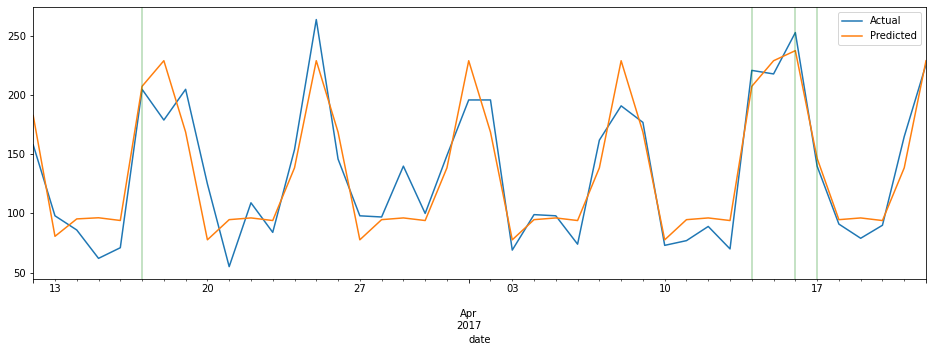

In [21]:
#Train a model
SARIMAX_model = SARIMAX(train['total'], 
                exog=train[['holiday']], 
                order=(1,0,0), 
                seasonal_order=(1,0,1,7), 
                enforce_invertibility=False)

#Fitting the model
SARIMAX_result = SARIMAX_model.fit()

#Prediction on the model
SARIMAX_pred = SARIMAX_result.predict(start = len(train), end = len(train)+len(test)-1, exog = test[['holiday']])

#Plotting the data
ax = test['total'].plot(label = 'Actual',legend= True);
SARIMAX_pred.plot(label = 'Predicted',legend = True);

for i in test[test['holiday']==1].index:
    ax.axvline(x=i, color = 'g', alpha = 0.3);

# Evaluation of the performance of SARIMAX Model

In [22]:
#Computing rmse
print('RMSE:',rmse(test['total'], SARIMAX_pred))
print('Mean:', test['total'].mean())

RMSE: 22.929751924418433
Mean: 134.26190476190476


- RMSE from Actual & Prediciton from SARIMA model is 31.9395417917054 where as RMSE of SARIMAX model is 22.929751924418433
- We have got less RMSE through SARIMAX

# Forecasting on unknown data

In [27]:
#Creating final model
final_model = SARIMAX(data1['total'], 
                      exog=data1[['holiday']], 
                      order=(1,0,0), 
                      seasonal_order=(1,0,1,7), 
                      enforce_invertibility=False)

#Fitting the model
final_result = final_model.fit()

#Forecasting 38 days
exog_forecast = data[478:][['holiday']]
fcast = final_result.predict(len(data1), 
                       len(data1)+38, 
                       exog = exog_forecast)

c:\users\bhavi\appdata\local\programs\python\python38\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


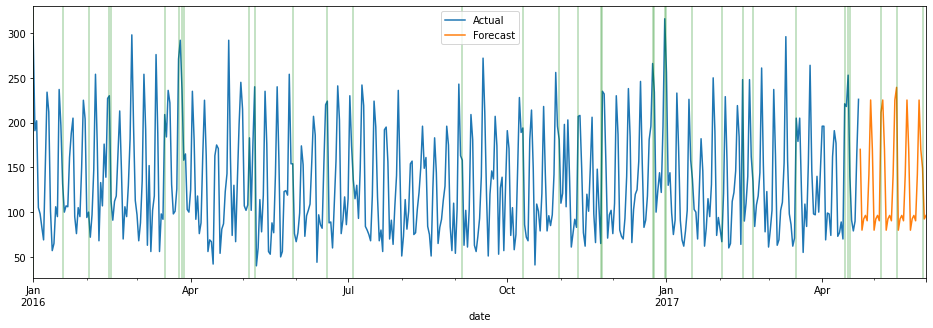

In [28]:
#Plotting actual and forecast
ax=data1['total'].plot(label = 'Actual',legend = True);
fcast.plot(label = 'Forecast',legend = True);
for i in data[data['holiday']==1].index:
    ax.axvline(x=i, color = 'g', alpha = 0.3);

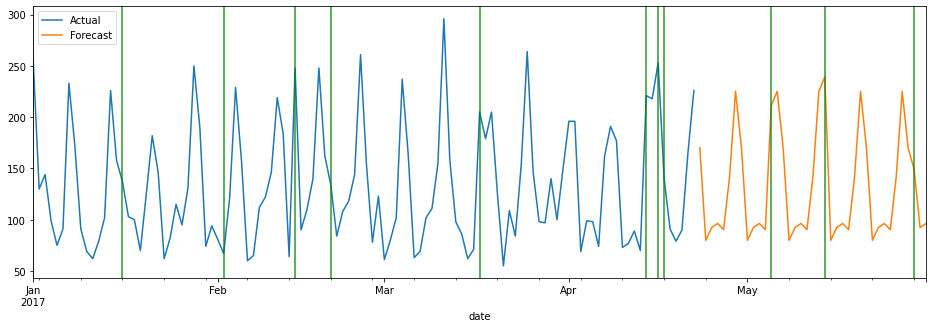

In [30]:
#Plotting actual and forecast from 2017-01-01
ax=data1['total'].loc['2017-01-01':].plot(label = 'Actual',legend = True);
fcast.plot(label = 'Forecast',legend = True);
for i in data[data['holiday']==1].index:
    ax.axvline(x=i, color = 'g', alpha = 0.83);